In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

plt.style.use(style='seaborn')
%matplotlib inline

<ipython-input-141-79307bfa0e65>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset yang akan dilakukan analisis
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data/XL.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,2130.0,2170.0,2120.0,2170.0,2083.028809,6972100
1,2023-01-03,2170.0,2380.0,2170.0,2350.0,2255.814697,46974300
2,2023-01-04,2340.0,2360.0,2310.0,2340.0,2246.215332,14346400
3,2023-01-05,2340.0,2350.0,2200.0,2290.0,2198.219482,23833000
4,2023-01-06,2270.0,2280.0,2220.0,2260.0,2169.421875,14351800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       306 non-null    object 
 1   Open       306 non-null    float64
 2   High       306 non-null    float64
 3   Low        306 non-null    float64
 4   Close      306 non-null    float64
 5   Adj Close  306 non-null    float64
 6   Volume     306 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.9+ KB


In [ ]:
data.Close.describe()

count     306.000000
mean     2177.026144
std       185.405128
min      1730.000000
25%      2030.000000
50%      2205.000000
75%      2330.000000
max      2560.000000
Name: Close, dtype: float64

In [ ]:
import pandas as pd

# Misalkan kolom indeks DataFrame Anda bernama 'Date'
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       306 non-null    datetime64[ns]
 1   Open       306 non-null    float64       
 2   High       306 non-null    float64       
 3   Low        306 non-null    float64       
 4   Close      306 non-null    float64       
 5   Adj Close  306 non-null    float64       
 6   Volume     306 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 16.9 KB


In [ ]:
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,2130.0,2170.0,2120.0,2170.0,2083.028809,6972100
2023-01-03,2170.0,2380.0,2170.0,2350.0,2255.814697,46974300
2023-01-04,2340.0,2360.0,2310.0,2340.0,2246.215332,14346400
2023-01-05,2340.0,2350.0,2200.0,2290.0,2198.219482,23833000
2023-01-06,2270.0,2280.0,2220.0,2260.0,2169.421875,14351800


In [ ]:
data.Close.describe()

count     306.000000
mean     2177.026144
std       185.405128
min      1730.000000
25%      2030.000000
50%      2205.000000
75%      2330.000000
max      2560.000000
Name: Close, dtype: float64

Text(0, 0.5, 'Price')

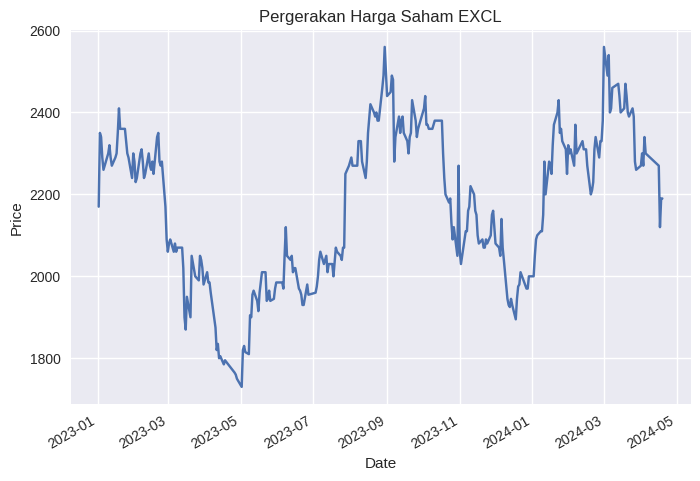

In [ ]:
data['Close'].plot()
plt.title('Pergerakan Harga Saham EXCL')
plt.ylabel('Price')

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data.Close)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(data.Close)

ADF Test Statistic : -2.174881284450348
p-value : 0.21548806600793285
#Lags Used : 1
Number of Observations Used : 304
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

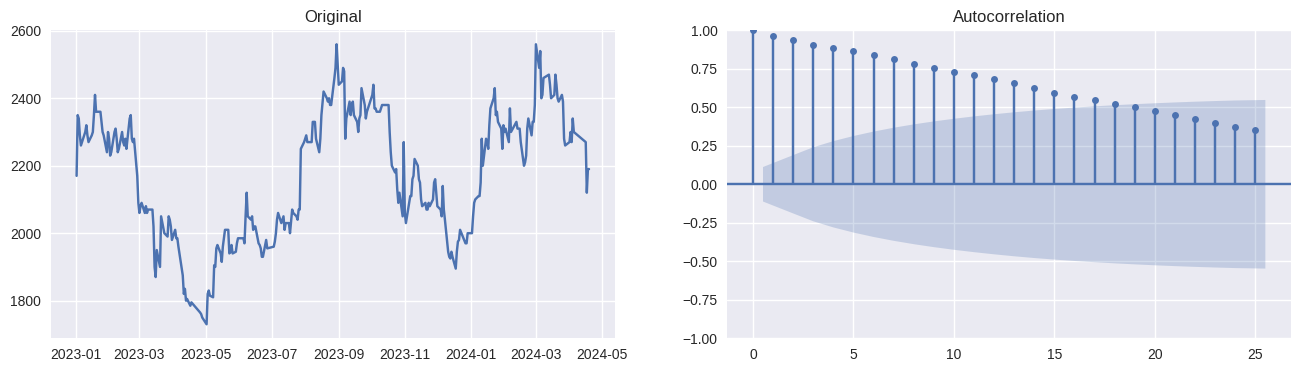

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(data.Close)
ax1.set_title('Original')

#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(data.Close, ax=ax2);

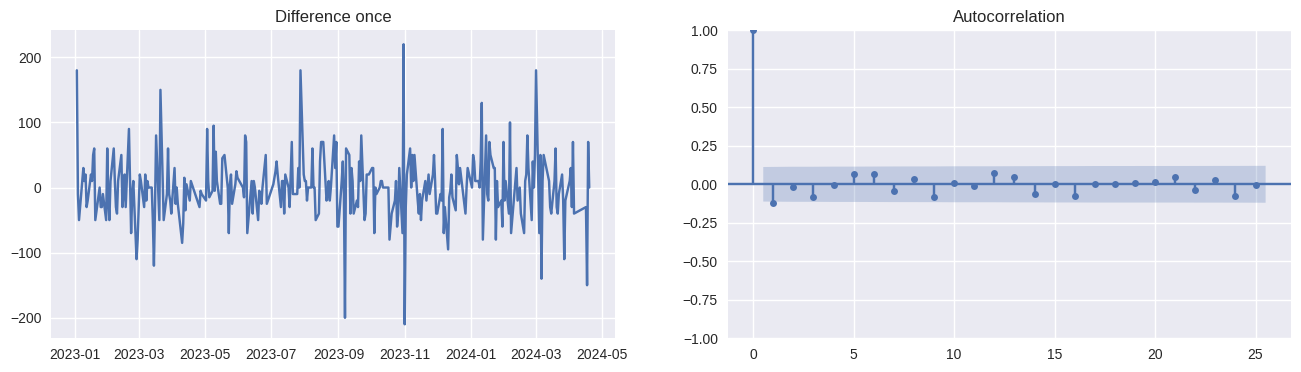

In [ ]:
diff = data.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference once')

#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
diff = data.Close.diff().dropna()
adfuller_test(diff)

ADF Test Statistic : -20.09090970908733
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 304
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
!pip install pmdarima
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
ndiffs(data.Close, test='adf')

1

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

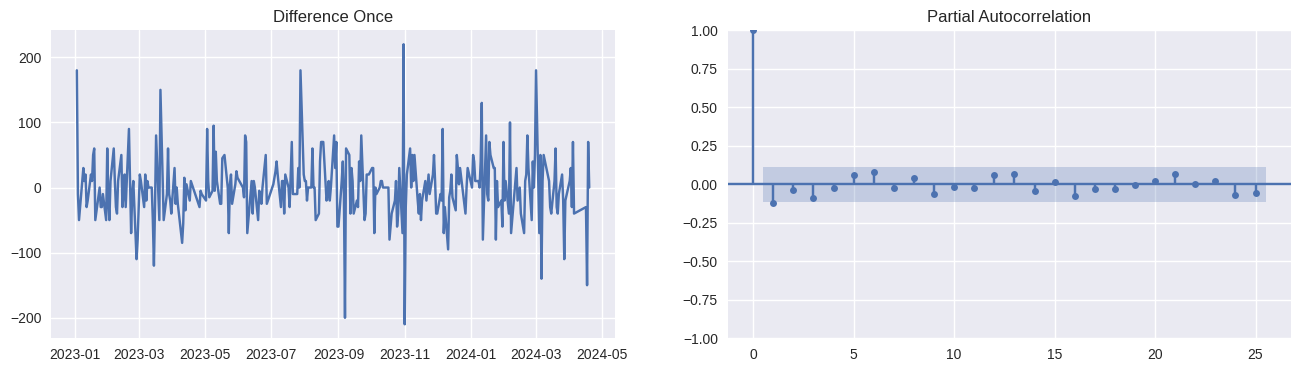

In [ ]:
diff = data.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

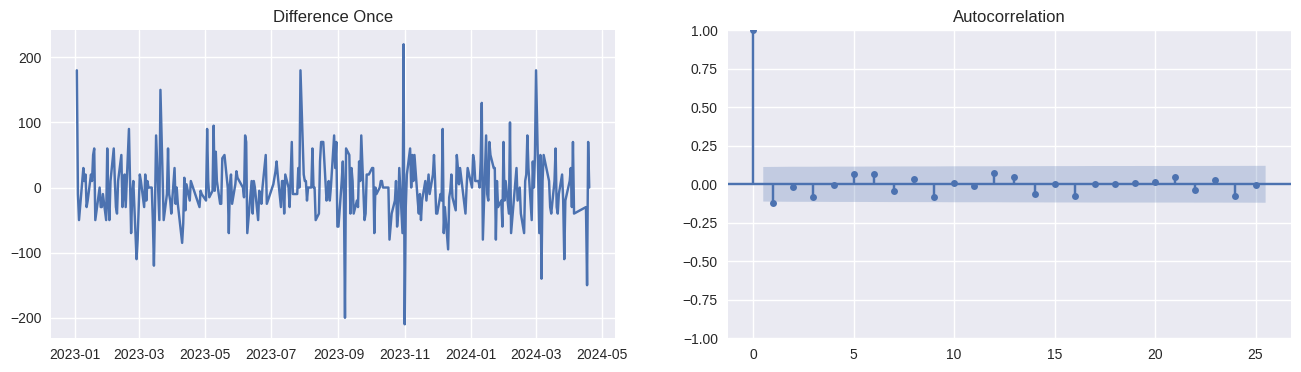

In [ ]:
diff = data.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [ ]:
len(data.Close)

306

In [ ]:
to_row = int(len(data)*0.9)

train = list(data[0:to_row]['Close'])
test = list(data[to_row:]['Close'])

In [ ]:
len(train)

275

In [ ]:
len(test)

31

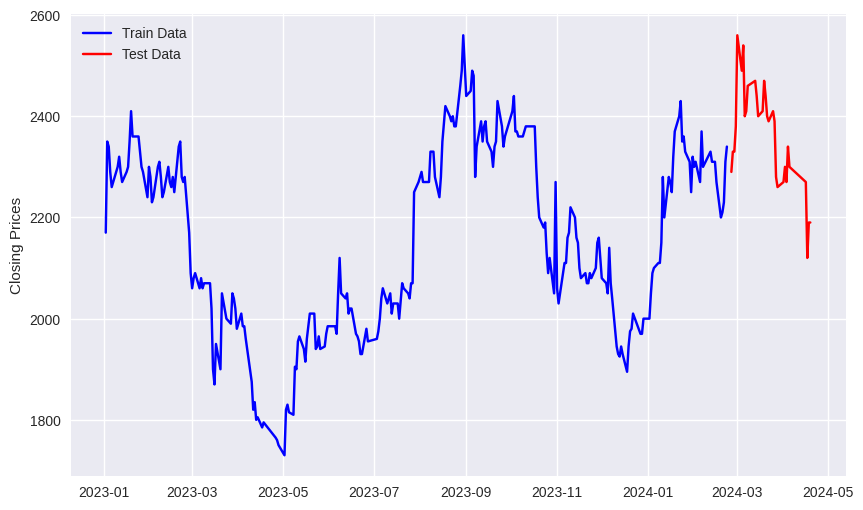

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel('Closing Prices')
plt.plot(data[0:to_row]['Close'], 'blue', label='Train Data')
plt.plot(data[to_row:]['Close'], 'red', label='Test Data')
plt.legend()

plt.show()

In [ ]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=2,
                             start_q=0,
                             test='adf',
                             seasonal=True,
                             trace=True,
                             stepwise=False)
    return automodel

In [ ]:
automodel = arimamodel(train)
print(automodel.summary)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=2914.991, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=2913.228, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=2914.819, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=2916.351, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=2918.350, Time=0.54 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=2919.529, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=2913.534, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=2914.635, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=2916.634, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=2918.351, Time=0.73 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=2920.334, Time=0.98 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=2915.095, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=2916.634, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=2914.967, Time=1.66 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=2915.873, Time=2.08 sec
 ARIMA(3,1

In [ ]:
automodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  275
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1453.614
Date:                Thu, 13 Jun 2024   AIC                           2913.228
Time:                        14:15:34   BIC                           2924.068
Sample:                             0   HQIC                          2917.579
                                - 275                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5232      2.624      0.199      0.842      -4.620       5.666
ma.L1         -0.1256      0.048     -2.604      0.009      -0.220      -0.031
sigma2      2373.2652    134.988     17.581      0.000    2108.693    2637.838
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               126.75
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.33
Prob(H) (two-sided):                  0.39   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_predictions = []
n_test_obser = len(test)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_obser):
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Mengambil nilai dari array numpy
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2792
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -16394.027
Date:                Thu, 13 Jun 2024   AIC                          32798.054
Time:                        14:33:33   BIC                          32827.725
Sample:                             0   HQIC                         32808.766
                               - 2792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2704      0.097     -2.777      0.005      -0.461      -0.080
ar.L2          0.6912      0.096      7.191      0.000       0.503       0.880
ma.L1          0.2330      0.091      2.567      0.0

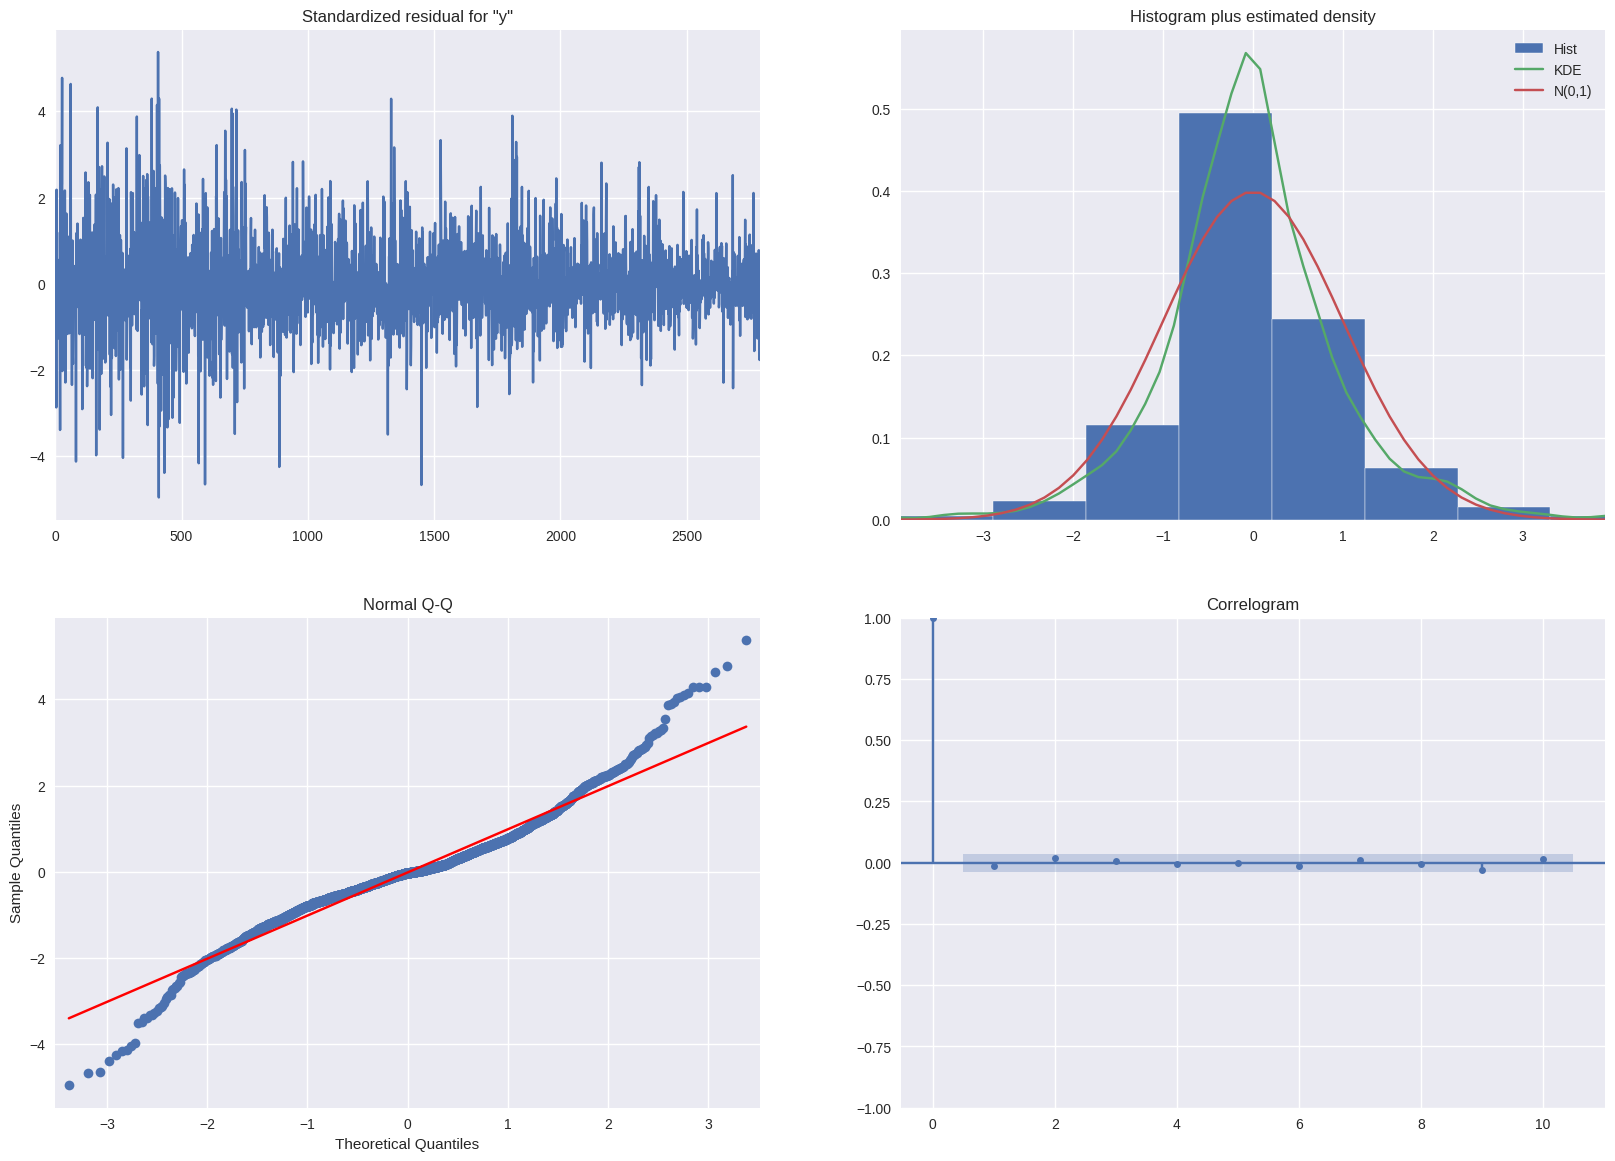

In [ ]:
model_fit.plot_diagnostics(figsize=(20, 14))
plt.show()

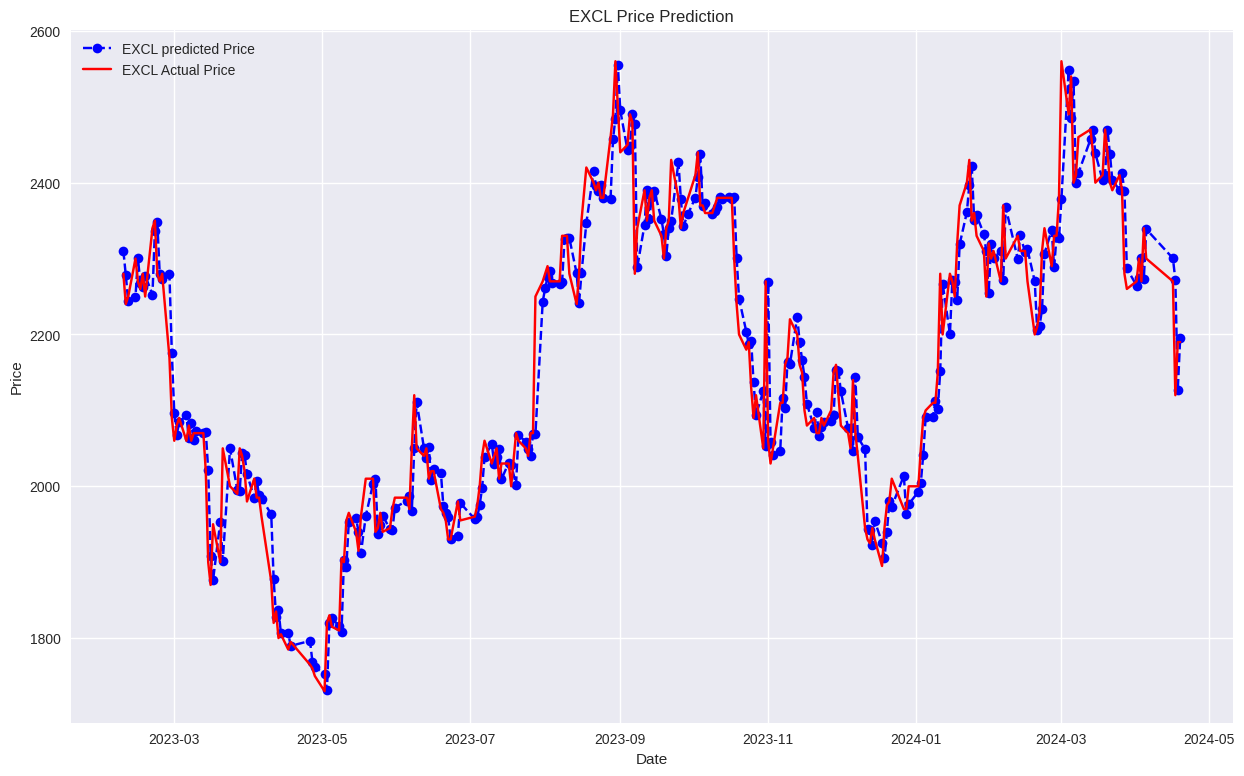

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker='o', ls='dashed', label='EXCL predicted Price')
plt.plot(date_range, test, color='red', label='EXCL Actual Price')

plt.title('EXCL Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Menghitung RMSE
rmse = sqrt(mean_squared_error(test, model_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 50.743


In [ ]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test))/np.abs(test))
print('MAPE: '+str(mape))

MAPE: 0.01653817675775639


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data/XL.csv')

# Misalkan kolom indeks DataFrame Anda bernama 'Date'
data['Date'] = pd.to_datetime(data['Date'])

data = data.set_index('Date')

data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-28,2280.0,2290.0,2240.0,2260.0,2217.427979,16894400
2024-04-01,2260.0,2300.0,2220.0,2270.0,2227.239502,44328600
2024-04-02,2290.0,2320.0,2250.0,2300.0,2256.674316,26378000
2024-04-03,2310.0,2320.0,2270.0,2270.0,2227.239502,13027600
2024-04-04,2300.0,2370.0,2290.0,2340.0,2295.920898,14852100
2024-04-05,2360.0,2370.0,2300.0,2300.0,2256.674316,12443700
2024-04-16,2300.0,2300.0,2220.0,2270.0,2227.239502,16666400
2024-04-17,2270.0,2290.0,2110.0,2120.0,2080.065186,22034500
2024-04-18,2120.0,2250.0,2120.0,2190.0,2148.746582,21685400


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat dan fitting model ARIMA
model2 = ARIMA(data['Close'], order=(2, 1, 2))
model_fit2 = model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2793
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -16399.403
Date:                Thu, 13 Jun 2024   AIC                          32808.806
Time:                        14:33:38   BIC                          32838.478
Sample:                             0   HQIC                         32819.518
                               - 2793                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2707      0.097     -2.778      0.005      -0.462      -0.080
ar.L2          0.6909      0.096      7.184      0.000       0.502       0.879
ma.L1          0.2333      0.091      2.567      0.010       0.055       0.411
ma.L2         -0.7444      0.090     -8.270      0.000      -0.921      -0.568
sigma2      7401.7672    125.261     59.091      0.000    7156.260    7647.274
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              1133.33
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from pandas.tseries.offsets import DateOffset

# Mengonversi indeks tanggal menjadi tipe Timestamp
data.index = pd.to_datetime(data.index)

# Membuat tanggal-tanggal di masa depan dengan tambahan satu hari
future_dates = []
for _ in range(10):
    future_date = data.index[-1] + DateOffset(days=1)
    future_dates.append(future_date)
    data.loc[future_date] = np.nan  # Menambahkan baris baru dengan nilai NaN

# Menampilkan tanggal-tanggal di masa depan
print(future_dates)

[Timestamp('2024-04-20 00:00:00'), Timestamp('2024-04-21 00:00:00'), Timestamp('2024-04-22 00:00:00'), Timestamp('2024-04-23 00:00:00'), Timestamp('2024-04-24 00:00:00'), Timestamp('2024-04-25 00:00:00'), Timestamp('2024-04-26 00:00:00'), Timestamp('2024-04-27 00:00:00'), Timestamp('2024-04-28 00:00:00'), Timestamp('2024-04-29 00:00:00')]


In [ ]:
future_dates

[Timestamp('2024-04-20 00:00:00'),
 Timestamp('2024-04-21 00:00:00'),
 Timestamp('2024-04-22 00:00:00'),
 Timestamp('2024-04-23 00:00:00'),
 Timestamp('2024-04-24 00:00:00'),
 Timestamp('2024-04-25 00:00:00'),
 Timestamp('2024-04-26 00:00:00'),
 Timestamp('2024-04-27 00:00:00'),
 Timestamp('2024-04-28 00:00:00'),
 Timestamp('2024-04-29 00:00:00')]

In [ ]:
future_dates_data = data.copy()
future_dates_data.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-28,2280.0,2290.0,2240.0,2260.0,2217.427979,16894400.0
2024-04-01,2260.0,2300.0,2220.0,2270.0,2227.239502,44328600.0
2024-04-02,2290.0,2320.0,2250.0,2300.0,2256.674316,26378000.0
2024-04-03,2310.0,2320.0,2270.0,2270.0,2227.239502,13027600.0
2024-04-04,2300.0,2370.0,2290.0,2340.0,2295.920898,14852100.0
2024-04-05,2360.0,2370.0,2300.0,2300.0,2256.674316,12443700.0
2024-04-16,2300.0,2300.0,2220.0,2270.0,2227.239502,16666400.0
2024-04-17,2270.0,2290.0,2110.0,2120.0,2080.065186,22034500.0
2024-04-18,2120.0,2250.0,2120.0,2190.0,2148.746582,21685400.0


In [ ]:
future = pd.read_csv('/content/drive/MyDrive/SKRIPSI/data/forecast.csv')
future.tail(20)

,Date,Close
2783,2024-03-28,2260.0
2784,2024-04-01,2270.0
2785,2024-04-02,2300.0
2786,2024-04-03,2270.0
2787,2024-04-04,2340.0
2788,2024-04-05,2300.0
2789,2024-04-16,2270.0
2790,2024-04-17,2120.0
2791,2024-04-18,2190.0
2792,2024-04-19,2190.0


In [ ]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2803 non-null   object 
 1   Close   2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.9+ KB


In [ ]:
future['forecast'] = model_fit2.predict(start=2720, end=2730, dynamic=True)

In [ ]:
# Menggunakan metode get_forecast() untuk memprediksi output, lower, dan upper bound dengan level kepercayaan 90%
forecast_results = model_fit2.get_forecast(steps=5, alpha=0.1)  # Menggunakan level kepercayaan 90%

# Mengisi hasil prediksi ke dalam DataFrame future
future['forecast'] = forecast_results.predicted_mean
future['lower_bound'] = forecast_results.conf_int(alpha=0.1)['lower Close']
future['upper_bound'] = forecast_results.conf_int(alpha=0.1)['upper Close']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
future.tail(15)

,Date,Close,forecast,lower_bound,upper_bound
2788,2024-04-05,2300.0,NaN,NaN,NaN
2789,2024-04-16,2270.0,NaN,NaN,NaN
2790,2024-04-17,2120.0,NaN,NaN,NaN
2791,2024-04-18,2190.0,NaN,NaN,NaN
2792,2024-04-19,2190.0,NaN,NaN,NaN
2793,2024-04-20,NaN,2190.234634,2048.722080,2331.747188
2794,2024-04-21,NaN,2194.146671,1997.728309,2390.565033
2795,2024-04-22,NaN,2193.249774,1957.659991,2428.839556
2796,2024-04-23,NaN,2196.195533,1928.038586,2464.352481
2797,2024-04-24,NaN,2194.778399,1899.174795,2490.382003


In [ ]:
# Misalkan kolom indeks DataFrame Anda bernama 'Date'
future['Date'] = pd.to_datetime(future['Date'])

In [ ]:
future = future.set_index('Date')

In [ ]:
future

,Close,forecast,lower_bound,upper_bound
Date,,,,
2013-01-02,5622.427246,NaN,NaN,NaN
2013-01-03,5671.747070,NaN,NaN,NaN
2013-01-04,5671.747070,NaN,NaN,NaN
2013-01-07,5622.427246,NaN,NaN,NaN
2013-01-08,5622.427246,NaN,NaN,NaN
...,...,...,...,...
2024-04-25,NaN,NaN,NaN,NaN
2024-04-26,NaN,NaN,NaN,NaN
2024-04-27,NaN,NaN,NaN,NaN


In [ ]:
# Mengisi nilai close pada tanggal 2023-12-29 ke dalam kolom forecast, lower_bound, dan upper_bound
future.loc['2024-04-19', ['forecast', 'lower_bound', 'upper_bound']] = future.loc['2024-04-19', 'Close']

# Memastikan bahwa nilai close pada tanggal 2023-12-29 telah ditambahkan ke dalam tabel forecast, lower_bound, dan upper_bound
future.tail(15)

,Close,forecast,lower_bound,upper_bound
Date,,,,
2024-04-05,2300.0,NaN,NaN,NaN
2024-04-16,2270.0,NaN,NaN,NaN
2024-04-17,2120.0,NaN,NaN,NaN
2024-04-18,2190.0,NaN,NaN,NaN
2024-04-19,2190.0,2190.000000,2190.000000,2190.000000
2024-04-20,NaN,2190.234634,2048.722080,2331.747188
2024-04-21,NaN,2194.146671,1997.728309,2390.565033
2024-04-22,NaN,2193.249774,1957.659991,2428.839556
2024-04-23,NaN,2196.195533,1928.038586,2464.352481


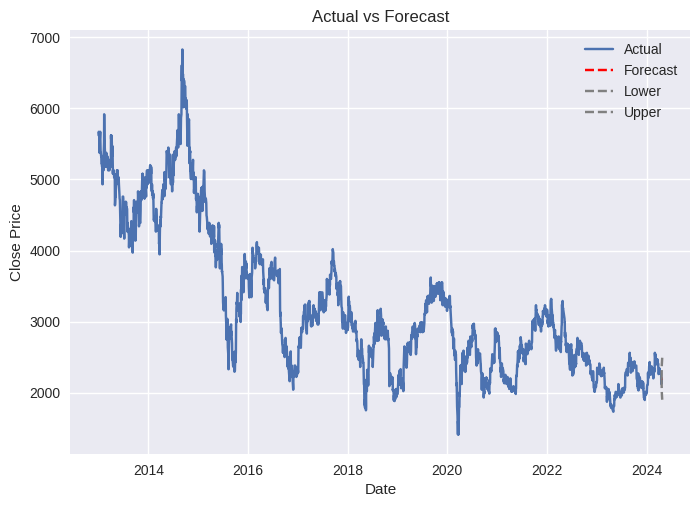

In [ ]:
import matplotlib.pyplot as plt

# Plot data asli
plt.plot(future.index, future['Close'], label='Actual')

# Plot forecast
plt.plot(future.index, future['forecast'], label='Forecast', linestyle='--', color='red')

plt.plot(future.index, future['lower_bound'], label='Lower', linestyle='--', color='grey')
plt.plot(future.index, future['upper_bound'], label='Upper', linestyle='--', color='grey')

# Label dan judul plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()

# Tampilkan plot
plt.show()

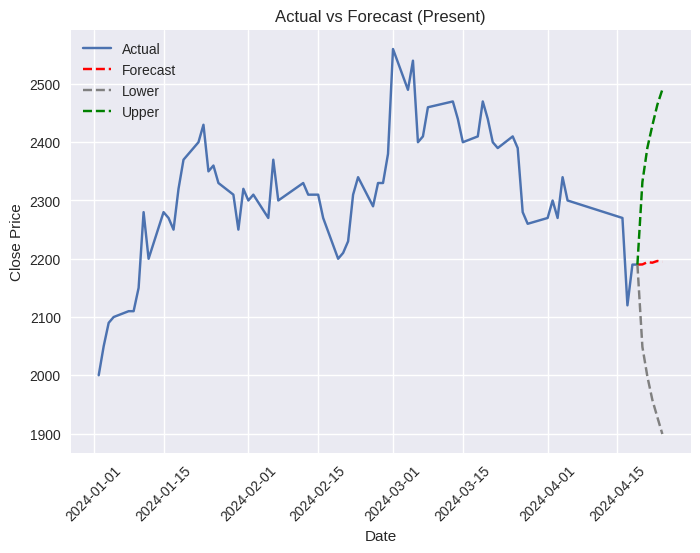

In [ ]:
# Slicing rentang dari bulan Januari 2024 hingga data terakhir
future_data_sliced = future['2024-01-01':]

# Plot data asli
plt.plot(future_data_sliced.index, future_data_sliced['Close'], label='Actual')

# Plot forecast
plt.plot(future_data_sliced.index, future_data_sliced['forecast'], label='Forecast', linestyle='--', color='red')
plt.plot(future_data_sliced.index, future_data_sliced['lower_bound'], label='Lower', linestyle='--', color='grey')
plt.plot(future_data_sliced.index, future_data_sliced['upper_bound'], label='Upper', linestyle='--', color='green')

# Label dan judul plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast (Present)')
plt.legend()
# Membuat label sumbu x miring
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()

In [ ]:
future.tail(10)

,Close,forecast,lower_bound,upper_bound
Date,,,,
2024-04-20,NaN,2190.234634,2048.722080,2331.747188
2024-04-21,NaN,2194.146671,1997.728309,2390.565033
2024-04-22,NaN,2193.249774,1957.659991,2428.839556
2024-04-23,NaN,2196.195533,1928.038586,2464.352481
2024-04-24,NaN,2194.778399,1899.174795,2490.382003
2024-04-25,NaN,NaN,NaN,NaN
2024-04-26,NaN,NaN,NaN,NaN
2024-04-27,NaN,NaN,NaN,NaN
2024-04-28,NaN,NaN,NaN,NaN
